<a href="https://colab.research.google.com/github/shzenith0916/Twitter_SentimentAnalysis/blob/main/V2_SentimentAnalysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Import libararies 라이브러리 임포트
import pandas as pd
import numpy as np
import re
import time
import matplotlib.pyplot as plt
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
# Chnage directory to the folder where the login infomraiton file is 로그인 파일이 있는곳으로 디렉토리 변경
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.getcwd()
twitter_keys = open('twitter_keys.txt','r').read().splitlines() #readlines() can read line by line
keys = [line.split(',') for line in twitter_keys]

In [7]:
# Or load the data directly 혹은 로그인 파일을 직접 올리기
from google.colab import files
uploaded = files.upload()

Saving twitter_keys.txt to twitter_keys (2).txt


In [8]:
twitter_keys = open('twitter_keys.txt','r').read().splitlines() #readlines() can read line by line
keys = [line.split(',') for line in twitter_keys]

In [9]:
# Twitter API Credentials

consumer_key = keys[0][1] #API KEY
consumer_secret = keys[1][1] #API KEY SECRET
access_token = keys[3][1] # ACESS TOKEN
access_token_secret = keys[4][1] # ACESS TOKEN SECRET

In [10]:
# Get authentification

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Search by user 유저에 따른 트윗

In [11]:
# Extract 1 tweet from the FOMC account for testing
test_post = api.user_timeline('@federalreserve', count=1, tweet_mode='extended')

In [12]:
# Print the recent 5 tweets from the user_id for testing, count개수를 5로 하여 최근 5개 트윗 불러오기 
test_tweet = api.user_timeline('@federalreserve', count=5, tweet_mode='extended')
for tweet in test_tweet:
  print(tweet.full_text)

#FedFAQ:  I received a suspicious-looking e-mail that claims to be from the Federal Reserve. Is it a scam?

Learn more:
https://t.co/0b1BglZWEY https://t.co/556ndcReG6
@federalreserve takes seriously claims of retaliation against whistleblowers who report a possible violation of law or regulation by depository institutions. Learn more: https://t.co/D1JYbC8OQw https://t.co/VoHr6E2pgP
Q3 consumer credit up 6.8%; revolving credit up 12.9%; nonrevolving credit up 4.9%; September consumer credit up 6.4% (SAAR): https://t.co/Zujt3BBoaT
Community financial institutions must prepare for the adoption of the Current Expected Credit Losses (CECL) standard. @federalreserve has developed tools to support community banks as they make this transition.

Learn more: https://t.co/cIlNIBtM7k https://t.co/9IEJAcdEgv
Now available: quarterly survey on bank lending practices covering bank loans to businesses and households: https://t.co/KFp6DltD4a


In [13]:
test_post

[Status(_api=<tweepy.api.API object at 0x7f3b32b1e990>, _json={'created_at': 'Tue Nov 08 19:24:44 +0000 2022', 'id': 1590062786192633856, 'id_str': '1590062786192633856', 'full_text': '#FedFAQ:  I received a suspicious-looking e-mail that claims to be from the Federal Reserve. Is it a scam?\n\nLearn more:\nhttps://t.co/0b1BglZWEY https://t.co/556ndcReG6', 'truncated': False, 'display_text_range': [0, 143], 'entities': {'hashtags': [{'text': 'FedFAQ', 'indices': [0, 7]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0b1BglZWEY', 'expanded_url': 'https://www.federalreserve.gov/consumerscommunities/fraud-scams.htm', 'display_url': 'federalreserve.gov/consumerscommu…', 'indices': [120, 143]}], 'media': [{'id': 1590062769222684673, 'id_str': '1590062769222684673', 'indices': [144, 167], 'media_url': 'http://pbs.twimg.com/media/FhEJqgIXkAEyINB.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FhEJqgIXkAEyINB.jpg', 'url': 'https://t.co/556ndcReG6', 'display_url': 'pi

 위의 트윗에서 주목할만한 변수들을 나열 해 보았습니다.<br>
 - user.screen_name: 유저
 - created_at: 트윗을 올린시간
 - favorite_count: 소스 트윗의 좋아요 횟수, provides the number of times the tweet has been favorited. 
 - full text: 트윗 내용
 - user_mentions: 유저가 언급한 다른 트위터 계정. 변수로 선택 x
 - source: 트윗을 올린 소스가 모바일이냐 혹은 pc인지 확인 가능
 - retweeted: False or True 로 미리 필터 가능한 줄 알았으나, 실제로 리트윗 되었더라도 False라고 나온 경우 다수 발견하여, 변수로 선택 x
 - retweet_count: 리트윗 된 횟수


In [14]:
for tweet in test_post[0:1]:
  print(tweet.created_at)
  print(tweet.user.screen_name)
  print(tweet.user.description)
  print(tweet.user.location)
  print(tweet.source)
  print(tweet.favorite_count)
  print(tweet.full_text)
  print(tweet.retweet_count)

2022-11-08 19:24:44
federalreserve
The official Twitter channel of the Board of Governors of the Federal Reserve System. Privacy Policy: http://t.co/pbRRCfwyou
Washington, D.C
Twitter Web App
20
#FedFAQ:  I received a suspicious-looking e-mail that claims to be from the Federal Reserve. Is it a scam?

Learn more:
https://t.co/0b1BglZWEY https://t.co/556ndcReG6
4


In [15]:
# 트윗데이터 중에서, 필요하다고 생각되는 변수 선택하여 트윗 디테일 불러오기
tw_list = [[tweet.user.screen_name, tweet.user.description, tweet.user.location, tweet.created_at, tweet.source, tweet.favorite_count, tweet.retweet_count, tweet.full_text] for tweet in test_tweet]
tw_list[0]

['federalreserve',
 'The official Twitter channel of the Board of Governors of the Federal Reserve System. Privacy Policy: http://t.co/pbRRCfwyou',
 'Washington, D.C',
 datetime.datetime(2022, 11, 8, 19, 24, 44),
 'Twitter Web App',
 20,
 4,
 '#FedFAQ:  I received a suspicious-looking e-mail that claims to be from the Federal Reserve. Is it a scam?\n\nLearn more:\nhttps://t.co/0b1BglZWEY https://t.co/556ndcReG6']

In [16]:
test_df = pd.DataFrame(tw_list, columns=['user', 'description', 'location','created_at', 'source', 'favorite_count', 'retweet_count', 'full_text'])
test_df

,user,description,location,created_at,source,favorite_count,retweet_count,full_text
0,federalreserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-08 19:24:44,Twitter Web App,20,4,#FedFAQ: I received a suspicious-looking e-ma...
1,federalreserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-08 15:00:38,Twitter Web App,25,6,@federalreserve takes seriously claims of reta...
2,federalreserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-07 20:01:32,Twitter Web App,138,53,Q3 consumer credit up 6.8%; revolving credit u...
3,federalreserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-07 19:29:55,Twitter Web App,24,10,Community financial institutions must prepare ...
4,federalreserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-07 19:01:26,Twitter Web App,35,13,Now available: quarterly survey on bank lendin...


In [17]:
# count_n is how mnay tweets to extract from the twitter_user
def tweets_by_user(user_id, count_n, language='en'):
  tweets = api.user_timeline(user_id, count=count_n, lang = language, tweet_mode='extended')
  tweet_list = [[tweet.user.name, tweet.user.description, tweet.user.location, tweet.created_at, tweet.full_text, tweet.source, tweet.favorite_count, tweet.retweet_count] for tweet in tweets]
  return tweet_list

In [18]:
# Print tweets in dataframe form
def tweet_df_userbased(user, count):
  posts = tweets_by_user(user_id=user, count_n=count)
  df = pd.DataFrame([tweet for tweet in posts], columns=('user', 'description', 'location', 'created_at','full_text', 'source', 'favorite_count', 'retweet_count') )
  return df

In [19]:
# Print the last 10 tweets from the user_id for testing
recent_ten = tweet_df_userbased('@federalreserve', 10)
recent_ten

,user,description,location,created_at,full_text,source,favorite_count,retweet_count
0,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-08 19:24:44,#FedFAQ: I received a suspicious-looking e-ma...,Twitter Web App,20,4
1,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-08 15:00:38,@federalreserve takes seriously claims of reta...,Twitter Web App,25,6
2,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-07 20:01:32,Q3 consumer credit up 6.8%; revolving credit u...,Twitter Web App,138,53
3,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-07 19:29:55,Community financial institutions must prepare ...,Twitter Web App,24,10
4,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-07 19:01:26,Now available: quarterly survey on bank lendin...,Twitter Web App,35,13
5,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-07 15:53:58,Having an issue with your bank? Did your cred...,Twitter Web App,52,13
6,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-07 14:15:04,"On November 14-15, @bankofcanada will host the...",Twitter Web App,66,26
7,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-04 20:16:03,Now available: Weekly data on the Assets and L...,Twitter Web App,54,18
8,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-04 20:05:07,"These developments, and future shocks, have th...",Twitter Web App,33,13
9,Federal Reserve,The official Twitter channel of the Board of G...,"Washington, D.C",2022-11-04 20:04:50,"A weaker outlook, higher interest rates, and u...",Twitter Web App,27,10


In [20]:
tw_hashtag = [[tweet.full_text, tweet.entities['hashtags']] for tweet in test_tweet]
tw_hashtag[0]

['#FedFAQ:  I received a suspicious-looking e-mail that claims to be from the Federal Reserve. Is it a scam?\n\nLearn more:\nhttps://t.co/0b1BglZWEY https://t.co/556ndcReG6',
 [{'text': 'FedFAQ', 'indices': [0, 7]}]]

In [21]:
tw_hashtag[0][1][0]['text']

'FedFAQ'

## 여러 유저들의 트윗 데이터

In [22]:
# influencers of cryptocurrency world  => 2022 updated soucrce: https://influencermarketinghub.com/top-crypto-influencers/
influencers = ['@VitalikButerin', '@rogerkver', '@aantop', '@TimDraper', '@SatoshiLite', 
               '@APompliano', '@ErikVoorhees', '@ToneVays', '@officialmcafee', '@IvanOnTech' ]
               
search_users = ['@bitcoin', '@ethereum', '@coinbase', '@binance', '@krakenfx']

In [23]:
Influencer_data = []

# Iterate through cryptocurrency influencer twitter accounts 
for person in influencers:

  # Extract 100 tweets
  bit_tweets = api.user_timeline(person, count=100, lang = 'en', tweet_mode='extended')
  
  # Loop through tweets
  for tweet in bit_tweets:
    text = tweet.full_text
    source = tweet.source
    date = tweet.created_at
    favorite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    Influencer_data.append({"user": person,
                           "date": date,
                            "text": text,
                           "source": source,
                            "favorite_count": favorite_count,
                            "retweet_count": retweet_count
                            })

In [24]:
Influencer_df = pd.DataFrame.from_dict(Influencer_data)
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count
0,@VitalikButerin,2022-11-09 01:29:27,@steelballa lol ur citing data from when eth w...,Twitter Web App,1170,36
1,@VitalikButerin,2022-11-09 00:46:02,@econoar $1b is still much more than I have,Twitter Web App,10041,571
2,@VitalikButerin,2022-11-08 01:55:10,@iyad_elbaghdadi I remember some internet foru...,Twitter Web App,494,44
3,@VitalikButerin,2022-11-08 01:41:13,@Cointelegraph HOW MANY REALLY CLEAR TIME ARRO...,Twitter Web App,4205,285
4,@rogerkver,2022-11-08 12:31:37,Good news: Democrats will lose today. \nBad ne...,Twitter for iPhone,462,65


In [25]:
Influencer_df.tail()

,user,date,text,source,favorite_count,retweet_count
805,@IvanOnTech,2022-10-29 17:51:36,"RT @elonmusk: Finally, the truth that carbs ar...",Twitter Web App,0,53480
806,@IvanOnTech,2022-10-29 16:10:21,@ctoLarsson BULLISH!,Twitter for iPhone,31,2
807,@IvanOnTech,2022-10-29 16:10:16,RT @ctoLarsson: Bitcoin!\n\n- First resistance...,Twitter for iPhone,0,60
808,@IvanOnTech,2022-10-29 15:35:46,DOGE starting the alt season 💥🤩,Twitter for iPhone,702,97
809,@IvanOnTech,2022-10-28 20:40:50,RT @AltcoinDailyio: Great conversation w/ @Iva...,Twitter for iPhone,0,28


In [26]:
#filepath
Influencer_df.to_csv("influencer_tweet_data_100.csv", encoding='utf-8')

# preprocessing/cleaning 데이터 전처리/클리닝
- re.sub 함수사용<br>
re.sub(pattern, replacement, string) 함수를 이용하여 주어진 string에서 pattern과 일치하는 내용을 replacement로 변경. <br>

In [27]:
import html

In [28]:
def remove_unnecessary(text):
  # Escaping out HTML characters including  ', &, >, <
  text = html.unescape(text)
  # remove twitter Return -> RT @xx 패턴을 가지고 있는 RT를 다 지우기 
  text = re.sub("RT @[\w]*:", "", text) 
  # remove twitter handles -> @xx 패턴을 가지고 있는 다른 유저 멘션을 지우기
  text = re.sub("@[\w]*","",text)
  # remove URLs
  text = re.sub("https?://[A-Za-z0-9./]*", "", text)
  # remove hyperlinks
  text = re.sub(r'https?:\/\/.\S+', "", text)
  # remove white spaces
  text = " ".join(text.split())
  return text

## Didn't remove punctuations, emojis, special characters including hashtag because those are important to read/interpret the sentiment/opinion.
## 해시태그를 포함한 특수문자, 문장부호 (!,?), 이모티콘은 감정/의견을 읽거나 해석하는 데 중요하기 때문에 제거하지 않았습니다

In [29]:
# 전처리하기 위한 테스팅 텍스트 콜
recent_ten['full_text'][1]

'@federalreserve takes seriously claims of retaliation against whistleblowers who report a possible violation of law or regulation by depository institutions. Learn more: https://t.co/D1JYbC8OQw https://t.co/VoHr6E2pgP'

In [30]:
# 테스팅 텍스트에 전처리 적용
remove_unnecessary(recent_ten['full_text'][1])

'takes seriously claims of retaliation against whistleblowers who report a possible violation of law or regulation by depository institutions. Learn more:'

In [31]:
# 데이터 프레임에 전처리 적용
Influencer_df['text'] = Influencer_df['text'].apply(remove_unnecessary)
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count
0,@VitalikButerin,2022-11-09 01:29:27,lol ur citing data from when eth was at like $...,Twitter Web App,1170,36
1,@VitalikButerin,2022-11-09 00:46:02,$1b is still much more than I have,Twitter Web App,10041,571
2,@VitalikButerin,2022-11-08 01:55:10,I remember some internet forum (somethingawful...,Twitter Web App,494,44
3,@VitalikButerin,2022-11-08 01:41:13,HOW MANY REALLY CLEAR TIME ARROWS BESIDE EACH ...,Twitter Web App,4205,285
4,@rogerkver,2022-11-08 12:31:37,Good news: Democrats will lose today. Bad news...,Twitter for iPhone,462,65


In [32]:
Influencer_df['text'] = Influencer_df['text'].apply(lambda text: remove_unnecessary(text))
Influencer_df.tail()

,user,date,text,source,favorite_count,retweet_count
805,@IvanOnTech,2022-10-29 17:51:36,"Finally, the truth that carbs are amazing can ...",Twitter Web App,0,53480
806,@IvanOnTech,2022-10-29 16:10:21,BULLISH!,Twitter for iPhone,31,2
807,@IvanOnTech,2022-10-29 16:10:16,Bitcoin! - First resistance flipped support - ...,Twitter for iPhone,0,60
808,@IvanOnTech,2022-10-29 15:35:46,DOGE starting the alt season 💥🤩,Twitter for iPhone,702,97
809,@IvanOnTech,2022-10-28 20:40:50,Great conversation w/ all about #crypto! We di...,Twitter for iPhone,0,28


# Sentiment Analysis using Vader model 베이더 모델을 이용한 감정분석
# Why am i using VADER model? / VADER 모델을 사용하는 이유
-  Polarity & Intensity(strength) of emotion Analysis 양극성(긍정/부정) 및 감정의 강도 분석<br>
-  Dealing with emojis and slang(ex.lol) 이모티콘과 속어 처리<br>
-  Better interpretation on capital points and punctuation(ex.'GOOD!!' is better than 'good') 대문자 및 구두점에 대한 더 나은 해석(예: 'GOOD!'가 'good'보다 낫다)<br>
-  Understand basic context of these words, such as “did not love” as a negative statement 사랑하지 않았다가 부정적인 말이라고 워딩의 문맥을 이해한다.

## Cons(-) of Vader 모델의 단점
- Accuracy is not great sometimes
- Cannot interpret scarcastic words/text


In [33]:
analyzer = SentimentIntensityAnalyzer()

In [34]:
Influencer_df['scores'] = Influencer_df['text'].apply(lambda text: analyzer.polarity_scores(text) )
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores
0,@VitalikButerin,2022-11-09 01:29:27,lol ur citing data from when eth was at like $...,Twitter Web App,1170,36,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp..."
1,@VitalikButerin,2022-11-09 00:46:02,$1b is still much more than I have,Twitter Web App,10041,571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@VitalikButerin,2022-11-08 01:55:10,I remember some internet forum (somethingawful...,Twitter Web App,494,44,"{'neg': 0.209, 'neu': 0.659, 'pos': 0.132, 'co..."
3,@VitalikButerin,2022-11-08 01:41:13,HOW MANY REALLY CLEAR TIME ARROWS BESIDE EACH ...,Twitter Web App,4205,285,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp..."
4,@rogerkver,2022-11-08 12:31:37,Good news: Democrats will lose today. Bad news...,Twitter for iPhone,462,65,"{'neg': 0.283, 'neu': 0.411, 'pos': 0.306, 'co..."


In [35]:
Influencer_df['compound']  = Influencer_df['scores'].apply(lambda score_dict: score_dict['compound'])
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores,compound
0,@VitalikButerin,2022-11-09 01:29:27,lol ur citing data from when eth was at like $...,Twitter Web App,1170,36,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.6486
1,@VitalikButerin,2022-11-09 00:46:02,$1b is still much more than I have,Twitter Web App,10041,571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,@VitalikButerin,2022-11-08 01:55:10,I remember some internet forum (somethingawful...,Twitter Web App,494,44,"{'neg': 0.209, 'neu': 0.659, 'pos': 0.132, 'co...",-0.5661
3,@VitalikButerin,2022-11-08 01:41:13,HOW MANY REALLY CLEAR TIME ARROWS BESIDE EACH ...,Twitter Web App,4205,285,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.6697
4,@rogerkver,2022-11-08 12:31:37,Good news: Democrats will lose today. Bad news...,Twitter for iPhone,462,65,"{'neg': 0.283, 'neu': 0.411, 'pos': 0.306, 'co...",0.1280


In [36]:
Influencer_df['scores'][4]['compound']

0.128

In [37]:
Influencer_df['text'].shape[0]

810

In [38]:
scores_dict_array=[]
for i in range(Influencer_df['text'].shape[0]):
  compound = analyzer.polarity_scores(Influencer_df['text'][i])['compound']
  pos =  analyzer.polarity_scores(Influencer_df['text'][i])['pos']
  neg =  analyzer.polarity_scores(Influencer_df['text'][i])['neg']
  neu =  analyzer.polarity_scores(Influencer_df['text'][i])['neu']
  
  scores_dict_array.append({"Compound": compound,
                 "Positive": pos,
                 "Negative": neg,
                 "Neutral": neu
                 })  

In [39]:
sentiment_scores = pd.DataFrame.from_dict(scores_dict_array)
sentiment_scores.head()

,Compound,Positive,Negative,Neutral
0,0.6486,0.371,0.000,0.629
1,0.0000,0.000,0.000,1.000
2,-0.5661,0.132,0.209,0.659
3,0.6697,0.174,0.000,0.826
4,0.1280,0.306,0.283,0.411


In [40]:
Influencer_df = Influencer_df.join(sentiment_scores)
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores,compound,Compound,Positive,Negative,Neutral
0,@VitalikButerin,2022-11-09 01:29:27,lol ur citing data from when eth was at like $...,Twitter Web App,1170,36,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.6486,0.6486,0.371,0.000,0.629
1,@VitalikButerin,2022-11-09 00:46:02,$1b is still much more than I have,Twitter Web App,10041,571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0000,0.000,0.000,1.000
2,@VitalikButerin,2022-11-08 01:55:10,I remember some internet forum (somethingawful...,Twitter Web App,494,44,"{'neg': 0.209, 'neu': 0.659, 'pos': 0.132, 'co...",-0.5661,-0.5661,0.132,0.209,0.659
3,@VitalikButerin,2022-11-08 01:41:13,HOW MANY REALLY CLEAR TIME ARROWS BESIDE EACH ...,Twitter Web App,4205,285,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.6697,0.6697,0.174,0.000,0.826
4,@rogerkver,2022-11-08 12:31:37,Good news: Democrats will lose today. Bad news...,Twitter for iPhone,462,65,"{'neg': 0.283, 'neu': 0.411, 'pos': 0.306, 'co...",0.1280,0.1280,0.306,0.283,0.411


In [41]:
cols = [7]
Influencer_df.drop(Influencer_df.columns[cols],axis=1,inplace=True)
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores,Compound,Positive,Negative,Neutral
0,@VitalikButerin,2022-11-09 01:29:27,lol ur citing data from when eth was at like $...,Twitter Web App,1170,36,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.6486,0.371,0.000,0.629
1,@VitalikButerin,2022-11-09 00:46:02,$1b is still much more than I have,Twitter Web App,10041,571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
2,@VitalikButerin,2022-11-08 01:55:10,I remember some internet forum (somethingawful...,Twitter Web App,494,44,"{'neg': 0.209, 'neu': 0.659, 'pos': 0.132, 'co...",-0.5661,0.132,0.209,0.659
3,@VitalikButerin,2022-11-08 01:41:13,HOW MANY REALLY CLEAR TIME ARROWS BESIDE EACH ...,Twitter Web App,4205,285,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.6697,0.174,0.000,0.826
4,@rogerkver,2022-11-08 12:31:37,Good news: Democrats will lose today. Bad news...,Twitter for iPhone,462,65,"{'neg': 0.283, 'neu': 0.411, 'pos': 0.306, 'co...",0.1280,0.306,0.283,0.411


In [42]:
# Compound value is computed by normalizing the scores of neg,pos,neu. 

def predict_sentiment(x):
  # x is compound value
  if x >= 0.05:
    return 'positive'
  elif x <= - 0.05:
    return 'negative'
  else:
    return 'neutral'

In [43]:
Influencer_df['label'] = sentiment_scores['Compound'].apply(lambda x: predict_sentiment(x))
#Influencer_df['label'] = Influencer_df['compound'].apply(lambda x: predict_sentiment(x))
Influencer_df.head()

,user,date,text,source,favorite_count,retweet_count,scores,Compound,Positive,Negative,Neutral,label
0,@VitalikButerin,2022-11-09 01:29:27,lol ur citing data from when eth was at like $...,Twitter Web App,1170,36,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.6486,0.371,0.000,0.629,positive
1,@VitalikButerin,2022-11-09 00:46:02,$1b is still much more than I have,Twitter Web App,10041,571,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral
2,@VitalikButerin,2022-11-08 01:55:10,I remember some internet forum (somethingawful...,Twitter Web App,494,44,"{'neg': 0.209, 'neu': 0.659, 'pos': 0.132, 'co...",-0.5661,0.132,0.209,0.659,negative
3,@VitalikButerin,2022-11-08 01:41:13,HOW MANY REALLY CLEAR TIME ARROWS BESIDE EACH ...,Twitter Web App,4205,285,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.6697,0.174,0.000,0.826,positive
4,@rogerkver,2022-11-08 12:31:37,Good news: Democrats will lose today. Bad news...,Twitter for iPhone,462,65,"{'neg': 0.283, 'neu': 0.411, 'pos': 0.306, 'co...",0.1280,0.306,0.283,0.411,positive


In [44]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from positive tweets 레이블이 있을 때 긍정적인 트윗의 해시태그 뽑아내기 
HT_positive = hashtag_extract(Influencer_df['text'][Influencer_df['label'] == 'positive'])
HT_positive
# another way to extract positive hashtags from dataframe 레이블이 없다면 Compound 값으로 긍정적인 트윗의 해시태그를 뽑아내는 또다른 방법
# HT_positive1 = hashtag_extract(Influencer_df['text'][Influencer_df['Compound'] > 0.05])

[[],
 [],
 ['ElectionDay2022'],
 ['Crypto', 'Polygon', 'AVAX', 'Ethereum'],
 ['約束'],
 [],
 ['bitcoin'],
 ['stkitts', 'Cryptocurency', 'ElSalvador'],
 [],
 [],
 ['BitcoinCash'],
 [],
 ['Crypto', 'Caribbean'],
 [],
 ['AVAX'],
 ['BTC', 'myspace'],
 [],
 ['podcast'],
 [],
 [],
 [],
 ['BitcoinCash'],
 ['BTC'],
 ['Bitcoin', 'BitcoinCash', 'Ethereum', 'Monero', 'Zcash'],
 [],
 [],
 ['Bitcoin'],
 [],
 [],
 ['Crypto',
  'Bitcoin',
  'BinanceSmartChain',
  'BitcoinCash',
  'Monero',
  'FreeMarkets',
  'investing',
  'MONEY'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Caribbean', 'StKitts', 'cryptocurrency', 'Bitcoin', 'BitcoinCash'],
 ['bitcoincash'],
 ['BitcoinCash', 'Caribbean'],
 ['Crypto', 'BitcoinCash', 'Bitcoin'],
 [],
 [],
 [],
 ['startup'],
 [],
 [],
 ['trust', 'freedom', 'youth', 'careers'],
 [],
 ['Miamiweb3'],
 ['freedom', 'trust'],
 ['blockchain', 'web3', 'crypto'],
 ['bitcoin', 'trust', 'freedom', 'startups'],
 ['bitcoin', 'trust', 'freedom'],
 ['trust', 'freedom', 'California'],
 ['bitcoin'

In [45]:
# unnesting list -> 빈 리스트를 지우고, 해시태그가 있는 리스트에서 해시태그만 모아서 새로운 리스트로 변환
HT_positive = sum(HT_positive,[])
HT_positive

['ElectionDay2022',
 'Crypto',
 'Polygon',
 'AVAX',
 'Ethereum',
 '約束',
 'bitcoin',
 'stkitts',
 'Cryptocurency',
 'ElSalvador',
 'BitcoinCash',
 'Crypto',
 'Caribbean',
 'AVAX',
 'BTC',
 'myspace',
 'podcast',
 'BitcoinCash',
 'BTC',
 'Bitcoin',
 'BitcoinCash',
 'Ethereum',
 'Monero',
 'Zcash',
 'Bitcoin',
 'Crypto',
 'Bitcoin',
 'BinanceSmartChain',
 'BitcoinCash',
 'Monero',
 'FreeMarkets',
 'investing',
 'MONEY',
 'Caribbean',
 'StKitts',
 'cryptocurrency',
 'Bitcoin',
 'BitcoinCash',
 'bitcoincash',
 'BitcoinCash',
 'Caribbean',
 'Crypto',
 'BitcoinCash',
 'Bitcoin',
 'startup',
 'trust',
 'freedom',
 'youth',
 'careers',
 'Miamiweb3',
 'freedom',
 'trust',
 'blockchain',
 'web3',
 'crypto',
 'bitcoin',
 'trust',
 'freedom',
 'startups',
 'bitcoin',
 'trust',
 'freedom',
 'trust',
 'freedom',
 'California',
 'bitcoin',
 'trust',
 'freedom',
 'RiversideFM',
 'bitcoin',
 'freedom',
 'trust',
 'SFcondo',
 'SFrealestate',
 'freedom',
 'trust',
 'freedom',
 'trust',
 'inflation',
 'bit

In [46]:
from collections import Counter
most_common = Counter(HT_positive).most_common(30) # 가장 자주 나오는 30개 해시태그 단어를 Counter함수로 세기
most_common

[('trust', 27),
 ('freedom', 26),
 ('bitcoin', 25),
 ('Bitcoin', 11),
 ('Litecoin', 9),
 ('LitecoinSummit2022', 8),
 ('BitcoinCash', 7),
 ('Crypto', 4),
 ('Caribbean', 3),
 ('web3', 3),
 ('startups', 3),
 ('decentralizeeverything', 3),
 ('toys', 3),
 ('FinancialSummit', 3),
 ('mcafeearchive', 3),
 ('AVAX', 2),
 ('Ethereum', 2),
 ('BTC', 2),
 ('Monero', 2),
 ('crypto', 2),
 ('deregulate', 2),
 ('space', 2),
 ('NFT', 2),
 ('NFTs', 2),
 ('music', 2),
 ('LTC', 2),
 ('Unconfiscatable', 2),
 ('ElectionDay2022', 1),
 ('Polygon', 1),
 ('約束', 1)]

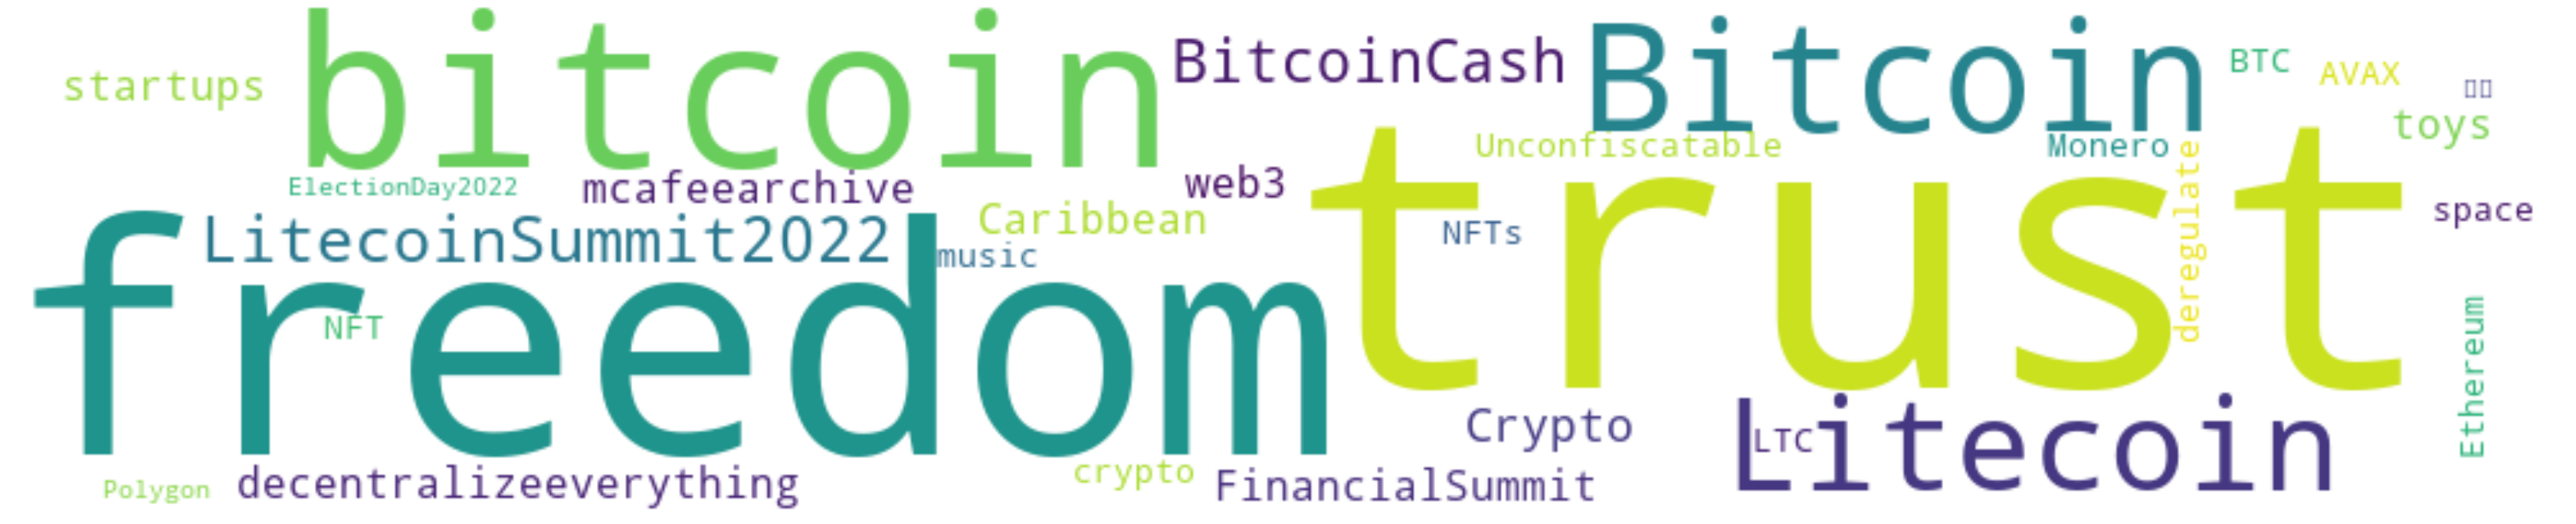

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, max_font_size=150, max_words=30, collocations=True, background_color='white')
# when collocations is set to False, birgrams of words are avoided.  

positive_ht_wordcloud = wc.generate_from_frequencies(dict(most_common)) # 프리퀀시에 따라 워드 클라우드 생성

plt.figure(figsize=(60,40))
plt.imshow(positive_ht_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

(array([ 13.,   8.,  14.,  12.,  18.,  25.,  19.,  16.,   8., 245.,  16.,
         20.,  18.,  52.,  62.,  65.,  56.,  43.,  62.,  38.]),
 array([-0.9477  , -0.851685, -0.75567 , -0.659655, -0.56364 , -0.467625,
        -0.37161 , -0.275595, -0.17958 , -0.083565,  0.01245 ,  0.108465,
         0.20448 ,  0.300495,  0.39651 ,  0.492525,  0.58854 ,  0.684555,
         0.78057 ,  0.876585,  0.9726  ]),
 <a list of 20 Patch objects>)

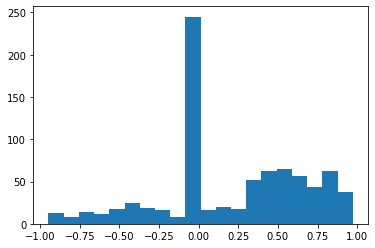

In [48]:
plt.hist(Influencer_df['Compound'], bins=20)

In [49]:
score_table = Influencer_df.pivot_table(index='user', values='Compound', aggfunc= np.mean)
score_table

,Compound
user,
@APompliano,0.236711
@ErikVoorhees,0.077016
@IvanOnTech,0.212595
@SatoshiLite,0.212360
@TimDraper,0.514322
@ToneVays,0.290921
@VitalikButerin,0.188050
@aantop,0.070250
@officialmcafee,0.178487


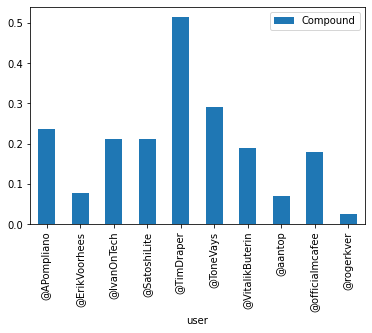

In [50]:
score_table.plot(kind="bar")

In [51]:
neg_score_table = Influencer_df.pivot_table(index='user', values='Negative', aggfunc= np.mean)
neg_score_table

,Negative
user,
@APompliano,0.07185
@ErikVoorhees,0.07506
@IvanOnTech,0.05297
@SatoshiLite,0.01842
@TimDraper,0.02473
@ToneVays,0.03348
@VitalikButerin,0.05225
@aantop,0.00000
@officialmcafee,0.06641


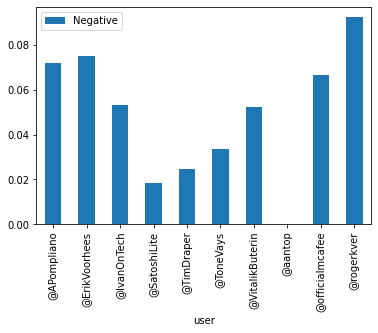

In [52]:
neg_score_table.plot(kind="bar")
# APompliano has the most negative tweets 

In [53]:
pos_score_table = Influencer_df.pivot_table(index='user', values='Positive', aggfunc= np.mean)
pos_score_table

,Positive
user,
@APompliano,0.178130
@ErikVoorhees,0.133650
@IvanOnTech,0.165050
@SatoshiLite,0.097050
@TimDraper,0.268530
@ToneVays,0.182740
@VitalikButerin,0.169250
@aantop,0.059833
@officialmcafee,0.161500


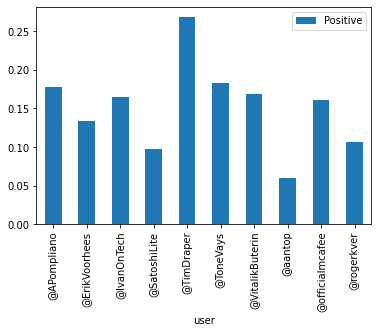

In [54]:
pos_score_table.plot(kind="bar")
# aantop has the least positive score

# Query by search words/hashtag 특정 단어(해시태그)에 따른 트윗

In [55]:
# query tweets by words
hashtag = 'itaewonhalloween'
date_since = "2022-10-29"
date_until = "2022-11-04"

In [56]:
# query tweets by words
tweet_amount = 10000
query = tweepy.Cursor(api.search, q = hashtag, since = date_since , until = date_until, count=100).items(tweet_amount) # count=100 means 100 max pagination

In [57]:
itaewonhalloween_tweets= [{"user": tweet.user.screen_name, "Text": tweet.text, "Created at": tweet.created_at, "Source": tweet.source,"Favorit_Count": tweet.favorite_count, "Retweet_Count": tweet.retweet_count} for tweet in query]
itaewon_df = pd.DataFrame.from_dict(itaewonhalloween_tweets)
itaewon_df.tail()

,user,Text,Created at,Source,Favorit_Count,Retweet_Count
9995,Rhyme1983,RT @GehenaKumar: The police officer is literal...,2022-10-31 14:51:02,Twitter Web App,0,748
9996,NathMMelo,RT @_jjax_: my prayers to all of the victims a...,2022-10-31 14:50:34,Twitter for Android,0,11586
9997,onyourjam13,RT @_jjax_: my prayers to all of the victims a...,2022-10-31 14:49:21,Twitter for iPhone,0,11586
9998,DoppioSP,RT @mebabyseoul: จากปากคำบอกเล่าของคนที่เพื่อน...,2022-10-31 14:49:04,Twitter for iPhone,0,355
9999,gnalievi_,RT @_jjax_: my prayers to all of the victims a...,2022-10-31 14:48:20,Twitter for Android,0,11586


In [58]:
itaewon_df['Text'] = itaewon_df['Text'].apply(remove_unnecessary)
itaewon_df.tail()

,user,Text,Created at,Source,Favorit_Count,Retweet_Count
9995,Rhyme1983,The police officer is literally screaming and ...,2022-10-31 14:51:02,Twitter Web App,0,748
9996,NathMMelo,my prayers to all of the victims and their fam...,2022-10-31 14:50:34,Twitter for Android,0,11586
9997,onyourjam13,my prayers to all of the victims and their fam...,2022-10-31 14:49:21,Twitter for iPhone,0,11586
9998,DoppioSP,จากปากคำบอกเล่าของคนที่เพื่อนเสียชีวิตต่อหน้า ...,2022-10-31 14:49:04,Twitter for iPhone,0,355
9999,gnalievi_,my prayers to all of the victims and their fam...,2022-10-31 14:48:20,Twitter for Android,0,11586


In [59]:
itaewon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user           10000 non-null  object        
 1   Text           10000 non-null  object        
 2   Created at     10000 non-null  datetime64[ns]
 3   Source         10000 non-null  object        
 4   Favorit_Count  10000 non-null  int64         
 5   Retweet_Count  10000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 468.9+ KB


# Sentiment Analysis using TextBlob library 텍스트블로브 라이브러리를 이용한 감정분석
- TextBlob는 자연어 처리(NLP)용 파이썬 라이브러리입니다. 
- 어휘 기반 접근 방식 lexicon-based approaches 으로 각 문장에서 단어의 강도를 평가하는데, 각 단어의 감정에 점수를 주고, 전체 감정을 더하여 평균을 구하는 풀링 연산 polling 방식으로 아웃풋을 구합니다. 
- 때문에, NLTK(Natural Language Toolkit)라이브러리를 이용합니다.
<br><br>
- TextBlob 는 극성 polarity 와 주관성을 subjectivity 아웃풋으로 줍니다. 
- polarity 극성은 결과가 -1 ~ 1사이  값이 나오고, <br> -1에 가까울수록 부정적 negative, 1에 가까울수록 긍정적 positive 입니다.
- subjectivty 주관성은 0 ~ 1 사이 값이 있고, <br>
1에 가까울수록 더 개인의 의견에 가깝고, 0에 가까울수록 조금 더 사실/팩트에 가까운 것을 나타냅니다.
<br><br>
- TextBlob가 트위터 데이터에 대해서 조금 더 positive한 결과를 보여주는 경향이 있다는 의견도 있습니다.
<br><br>

In [60]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from textblob import TextBlob

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [62]:
 # Create two new columns ‘Subjectivity’ & ‘Polarity’데이터프레임에 두개의 새로운 행 추가 -> 주관성, 극성
itaewon_df['Subjectivity'] = itaewon_df['Text'].apply(getSubjectivity)
itaewon_df['Polarity'] = itaewon_df['Text'].apply(getPolarity)
itaewon_df.tail()

,user,Text,Created at,Source,Favorit_Count,Retweet_Count,Subjectivity,Polarity
9995,Rhyme1983,The police officer is literally screaming and ...,2022-10-31 14:51:02,Twitter Web App,0,748,0.670833,-0.095833
9996,NathMMelo,my prayers to all of the victims and their fam...,2022-10-31 14:50:34,Twitter for Android,0,11586,0.000000,0.000000
9997,onyourjam13,my prayers to all of the victims and their fam...,2022-10-31 14:49:21,Twitter for iPhone,0,11586,0.000000,0.000000
9998,DoppioSP,จากปากคำบอกเล่าของคนที่เพื่อนเสียชีวิตต่อหน้า ...,2022-10-31 14:49:04,Twitter for iPhone,0,355,0.000000,0.000000
9999,gnalievi_,my prayers to all of the victims and their fam...,2022-10-31 14:48:20,Twitter for Android,0,11586,0.000000,0.000000


In [67]:
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

itaewon_df['Analysis'] = itaewon_df['Polarity'].apply(lambda x: getAnalysis(x))

In [68]:
itaewon_df.head()

,user,Text,Created at,Source,Favorit_Count,Retweet_Count,Subjectivity,Polarity,Analysis
0,tzuphoria,I’m a survivor of the #ItaewonCrowdCrush on 29...,2022-11-03 23:59:56,Twitter for Android,0,9888,1.0,0.0,Neutral
1,han131njjang,I’m a survivor of the #ItaewonCrowdCrush on 29...,2022-11-03 23:59:50,Twitter for Android,0,9888,1.0,0.0,Neutral
2,june_kos2,I’m a survivor of the #ItaewonCrowdCrush on 29...,2022-11-03 23:57:41,Twitter Web App,0,9888,1.0,0.0,Neutral
3,NamhungKittisak,แจกเครดิตฟรีได้จริง รับมาแล้ว ! บริการ 24 ชม.🎊...,2022-11-03 23:57:35,Twitter for Android,0,909,0.0,0.0,Neutral
4,ATon80635517,แจกเครดิตฟรีได้จริง รับมาแล้ว ! บริการ 24 ชม.🎊...,2022-11-03 23:54:28,Twitter for Android,0,909,0.0,0.0,Neutral


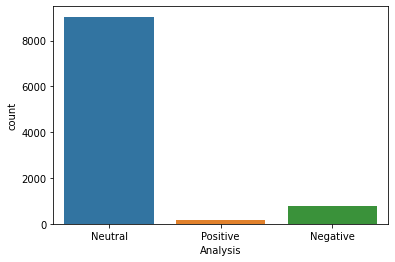

In [74]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import seaborn as sns
sns.countplot(itaewon_df['Analysis'], label= 'count')

Reference Source: 

- crytocurrency <br>
1) https://influencermarketinghub.com/top-crypto-influencers/ <br>
- sentiment analysis <br>
1) vader- https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e <br>
2) textblob - https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524 <br>
3) textblob - https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
- wordcloud
1) https://knowable.tistory.com/5
2) https://medium.com/codex/making-wordcloud-of-tweets-using-python-ca114b7a4ef4

Futher studies

- mining reply tweet <br>
1) https://towardsdatascience.com/mining-replies-to-tweets-a-walkthrough-9a936602c4d6 <br>
